## Retrieving article topic profiles

In [38]:
import json

es_response_raw = ! ssh root@52.31.100.64 'curl -s "recsyses.data-dev.schibsted.io:9200/ap-monthly-topic-profiles/_search?q=*&size=5000" 2> bla.txt' 

es_response = json.loads(es_response_raw[0])

def doc_to_dict(doc):
    return {'article':int(doc['_id']), 'topics': doc['_source']['topics']}
article_topics_records = [doc_to_dict(doc) for doc in es_response['hits']['hits']]

In [40]:
import pandas as pd

article_topics = pd.DataFrame(index=[d['article'] for d in article_topics_records], 
                              data=[d['topics'] for d in article_topics_records])

article_topics.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
8300096,0.001700,0.001835,0.002541,0.002097,0.003225,0.003449,0.015632,0.003019,0.007726,0.002342,...,0.002083,0.002515,0.002936,0.001725,0.007913,0.004912,0.003362,0.007722,0.006368,0.039793
8300203,0.003649,0.003883,0.005994,0.003693,0.005276,0.005931,0.006708,0.005004,0.011292,0.004224,...,0.007560,0.005036,0.007448,0.004508,0.006877,0.005228,0.005199,0.010470,0.013334,0.006423
8300396,0.003106,0.005451,0.004632,0.002758,0.004515,0.004550,0.006119,0.003845,0.004354,0.003455,...,0.008365,0.004923,0.025238,0.143237,0.005796,0.005076,0.003565,0.006166,0.007457,0.012011
8300613,0.004271,0.005707,0.005329,0.003464,0.027006,0.004713,0.005186,0.004422,0.004439,0.004146,...,0.053311,0.004021,0.007609,0.005046,0.004538,0.006135,0.004207,0.004976,0.011306,0.006676
8302896,0.006515,0.006785,0.007237,0.006568,0.007112,0.007288,0.020609,0.006996,0.009004,0.006781,...,0.006785,0.008080,0.007264,0.007175,0.008413,0.007518,0.007117,0.008016,0.020060,0.006839


## Retrieving articles title and categories

In [59]:
import json

es_response_raw = ! ssh root@52.31.100.64 'curl -s "recsyses.data-dev.schibsted.io:9200/ap/_search?q=*&fields=title,categories&size=100000" 2> bla.txt' 

es_response = json.loads(es_response_raw[0])

def doc_to_dict(doc):
    return {'article':int(doc['_id']), 'categories': doc['fields']['categories'], 'title': doc['fields']['title'][0]}
article_records = [doc_to_dict(doc) for doc in es_response['hits']['hits']]

print(len(article_records))

33070


In [60]:
import pandas as pd

article = pd.DataFrame.from_records(article_records, index='article')

article.head()

,categories,title
article,,
8025689,"[sport inbox, forsiden]",Ikke engang Carlsen kan matche sjakkometens ut...
7821113,"[innenriks, forsiden, lørdag (da)]",Tatt av hunden
7966940,"[verden, forsiden]","Flere dødsdømte, men færre henrettelser i 2014"
7956340,"[innsikt, anbefalt, fakta, forsiden, søndag (da)]",Guide: Jorden for nybegynnere
7967013,"[sport inbox, forsiden]",Mix lever stjernelivet i New York: - Det er en...


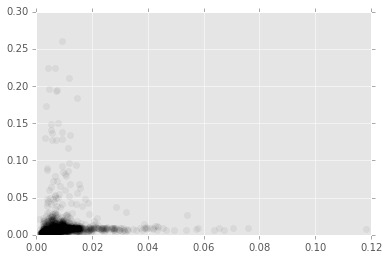

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.plot(article_topics[0], article_topics[1], 'ko', alpha=.05)